In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
from torch.utils.data import DataLoader

In [2]:
test_transformation_path = 'F:\\test-transformation'

def imshow(img):
    # img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.figure(figsize = (20, 4))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
#     plt.show()


def resize2d(img, size):
    return (F.adaptive_avg_pool2d(Variable(img, volatile=True), size)).data


# a simple custom collate function, just to show the idea
def my_collate(batch):
    data = torch.stack([item[0] for item in batch])
    # data = torch.stack([resize2d(item[0], 224) for item in batch])
    target = [item[1] for item in batch]
    # AdaptiveAvgPooling
    target = torch.LongTensor(target)
    return [data, target]


def load_dataset(_transform=torchvision.transforms.ToTensor()):
    # data_path = 'data/train/'
    data_path = test_transformation_path
    train_dataset = torchvision.datasets.ImageFolder(root=data_path, transform=_transform, )
    train_loader = DataLoader(train_dataset, batch_size=16, num_workers=0, collate_fn=my_collate, shuffle=False)
    return train_loader


def show_transformed_images(_transform=None):
    trainloader = load_dataset(_transform)
    dataiter = iter(trainloader)
    images, labels = next(dataiter)

    # show images # Let us show some of the training images, for fun.
    imshow(torchvision.utils.make_grid(images))

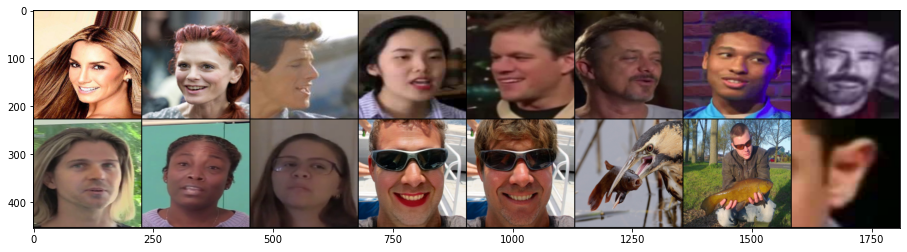

In [3]:
transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])
show_transformed_images(transform)

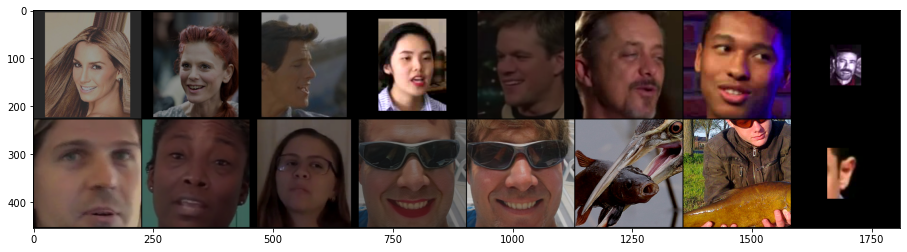

In [4]:
transform = transforms.Compose([
        transforms.CenterCrop(224),
        transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0, hue=0),
        transforms.ToTensor()
    ])
show_transformed_images(transform)

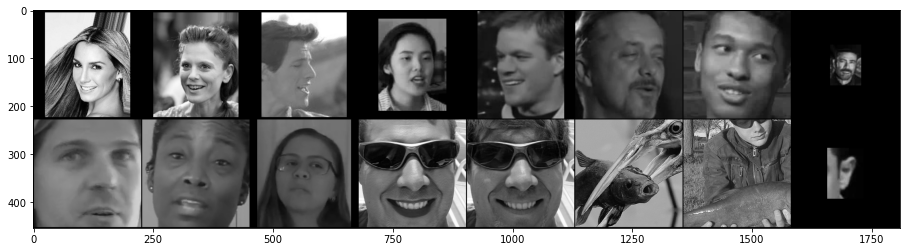

In [5]:
transform = transforms.Compose([
        transforms.CenterCrop(224),
        transforms.Grayscale(num_output_channels=1),
        transforms.ToTensor()
    ])
show_transformed_images(transform)

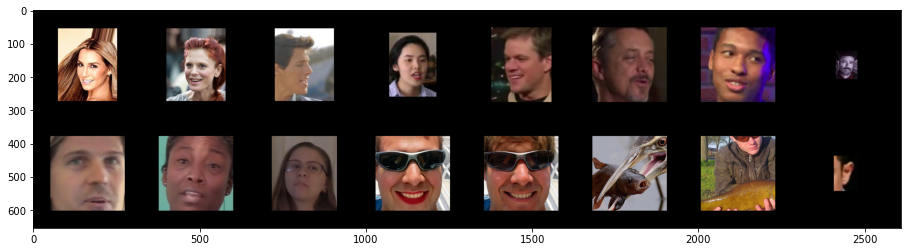

In [6]:
transform = transforms.Compose([
        transforms.CenterCrop(224),
        transforms.Pad(50),
        transforms.ToTensor()
    ])
show_transformed_images(transform)

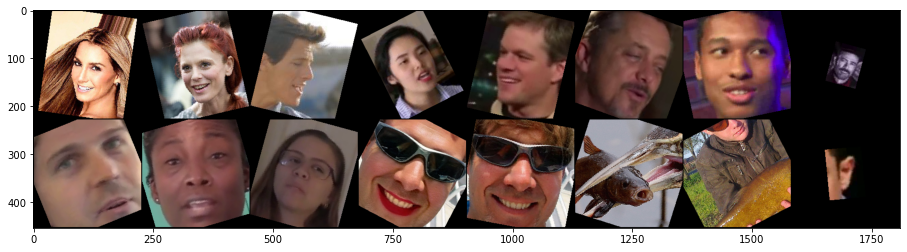

In [7]:
transform = transforms.Compose([
        transforms.CenterCrop(224),
        transforms.RandomAffine(30, translate=None, scale=None, shear=None, resample=False, fillcolor=0),
        transforms.ToTensor()
    ])
show_transformed_images(transform)

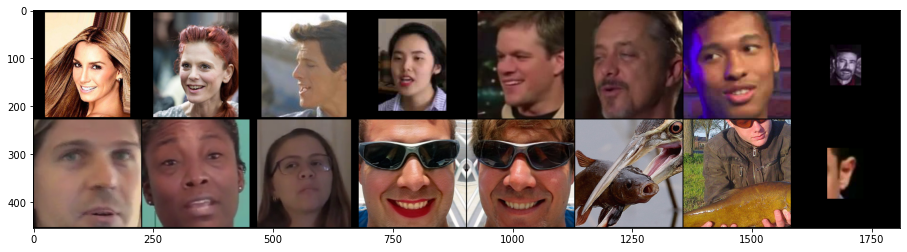

In [8]:
transform = transforms.Compose([
        transforms.CenterCrop(224),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.ToTensor()
    ])
show_transformed_images(transform)